# Strategic Measure Number of Returns to Homelessness Exploratory Notebook

## Import the data

### Things we want to learn:

* We created a function to use, but can we improve it with the data we have?
    * What would the dataset look like and how would correlation improve/decrease if we just import the data as-is using pandas?
    * Can we do more to clean this?
    * Can we feature engineer columns needed?
* What demographic_categories are the most likely to slip into homelessness?
    * Out of those categories, which specifi_demographic sees the highest rates?
* What programs have the lowest/highest rate of returns to homelessness?



In [11]:
import pandas as pd
from app import wrangle_without_dt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [14]:
df_return_to_homelessness = pd.read_csv("Strategic_Measure_Number_of_returns_to_homelessness.csv")

In [15]:
# View first 20 rows to ensure data was ported properly via wrangle
# Also allows us to start visualizing data
df_return_to_homelessness.head(20)

,Unnamed: 0,demographic_category,specific_demographic,fiscal_year,so_es_th_sh_ph,numerator,denominator,rate,fiscal_year_start,fiscal_year_end
0,0,Race,American Indian or Alaskan Native,2017,SO,0,0,0.0,2016-10-01,2017-09-30
1,1,Race,Asian,2017,SO,0,0,0.0,2016-10-01,2017-09-30
2,2,Race,Black or African American,2017,SO,0,0,0.0,2016-10-01,2017-09-30
3,3,Race,Native Hawaiian or Other Pacific Islander,2017,SO,0,0,0.0,2016-10-01,2017-09-30
4,4,Race,White,2017,SO,0,0,0.0,2016-10-01,2017-09-30
5,5,Race,Client Doesn't Know or Client Refused,2017,SO,0,0,0.0,2016-10-01,2017-09-30
6,6,Ethnicity,Hispanic/Latino,2017,SO,0,0,0.0,2016-10-01,2017-09-30
7,7,Ethnicity,Non-Hispanic/Non-Latino,2017,SO,0,0,0.0,2016-10-01,2017-09-30
8,8,Ethnicity,Client Doesn't Know or Client Refused,2017,SO,0,0,0.0,2016-10-01,2017-09-30
9,9,Gender,Female,2017,SO,0,0,0.0,2016-10-01,2017-09-30


## Data Preprocessing

### Do all the data types match what the column should be?
For example, is our Fiscal Year an integer? Is the rate saved as a float? What do we have to work with?

In [16]:
# Look into .info() to see how the columns are stored.
# Verbose allows you to look at all the columns instead of the set max columns panda returns by default.
df_return_to_homelessness.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            490 non-null    int64  
 1   demographic_category  490 non-null    object 
 2   specific_demographic  490 non-null    object 
 3   fiscal_year           490 non-null    int64  
 4   so_es_th_sh_ph        490 non-null    object 
 5   numerator             490 non-null    int64  
 6   denominator           490 non-null    int64  
 7   rate                  490 non-null    float64
 8   fiscal_year_start     490 non-null    object 
 9   fiscal_year_end       490 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 38.4+ KB


### How is the data distributed?
.Describe() will give us our metrics. We can get a good idea of how the data falls from min to max. We can also see if there are large jumps in our data(ie if we had numerator start at 0, but it's max was 1,000,000)

In [17]:
df_return_to_homelessness.describe()

,Unnamed: 0,fiscal_year,numerator,denominator,rate
count,490.00000,490.000000,490.000000,490.000000,490.000000
mean,244.50000,2018.408163,13.646939,75.661224,0.126184
std,141.59508,1.087546,26.127418,141.377548,0.173231
min,0.00000,2017.000000,0.000000,0.000000,0.000000
25%,122.25000,2017.000000,0.000000,0.000000,0.000000
50%,244.50000,2018.000000,1.000000,5.000000,0.055000
75%,366.75000,2019.000000,10.000000,62.750000,0.190000
max,489.00000,2020.000000,145.000000,801.000000,1.390000


all but Fiscal Year start at a 0. Data does not range higher than 1,000 in max value. I do not think we need to change this part of the data.

## EDA
* Graph Plots
* Plotly Visualizations
* Target identification and Feature Engineering

<AxesSubplot:>

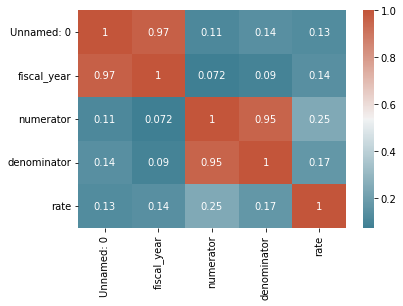

In [18]:
# Create a correlation matrix
corr = df_return_to_homelessness.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Heat map shows correlation between columns. We can see that the fiscal year does not hold much value in terms of the data. We may try removing this and seeing how it affects the correlation.
Another point to take into consideration is that it should be ***numerator/denominator = rate***. If this is the formula used, keeping the numerator and denominator will cause a great amount of data leakage. 

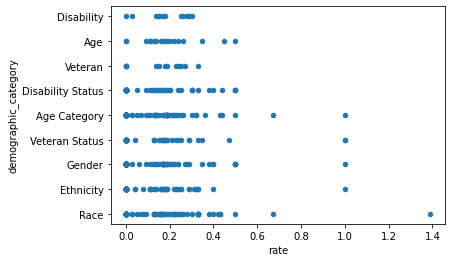

In [7]:
df_return_to_homelessness.plot(kind='scatter', x='rate', y='demographic_category');

We can see that the dataset has a couple of outliers. One specific datapoint in race is unusually high. We may consider removing this and filtering the data.

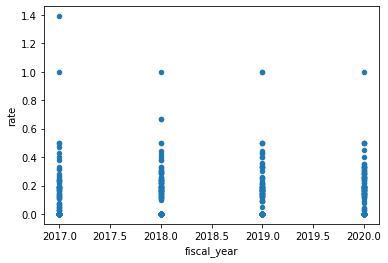

In [8]:
df_return_to_homelessness.plot(kind='scatter', x='fiscal_year', y='rate');

Data is clustered heavily around 0.6 in Rate. If we filter the data to only return up to there, then we can effectively eliminate the outliers.

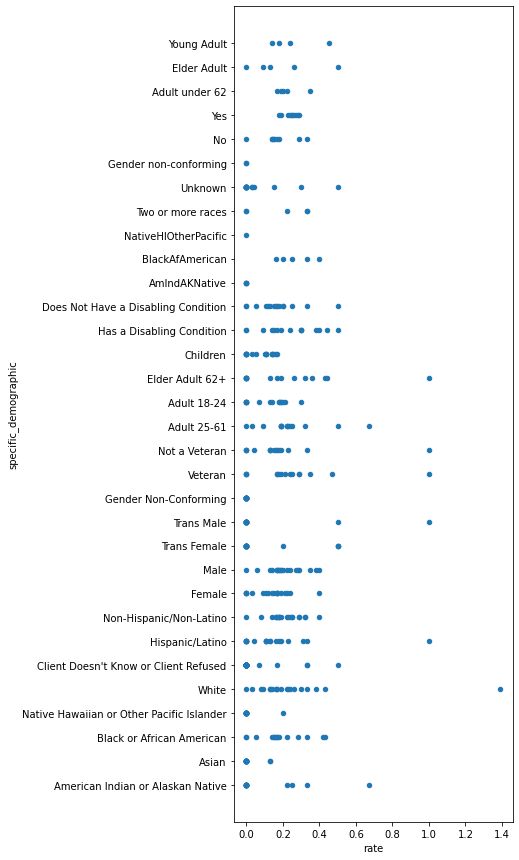

In [9]:
df_return_to_homelessness.plot(kind='scatter', x='rate', y='specific_demographic', figsize=(5,15));

Reaffirms suspisions that we should cut rate from 0.6. This will benefit the dataset.

### Some Fun Stuff

C:\Users\Alex Lucchesi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alex Lucchesi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Alex Lucchesi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

<AxesSubplot:xlabel='rate', ylabel='Density'>

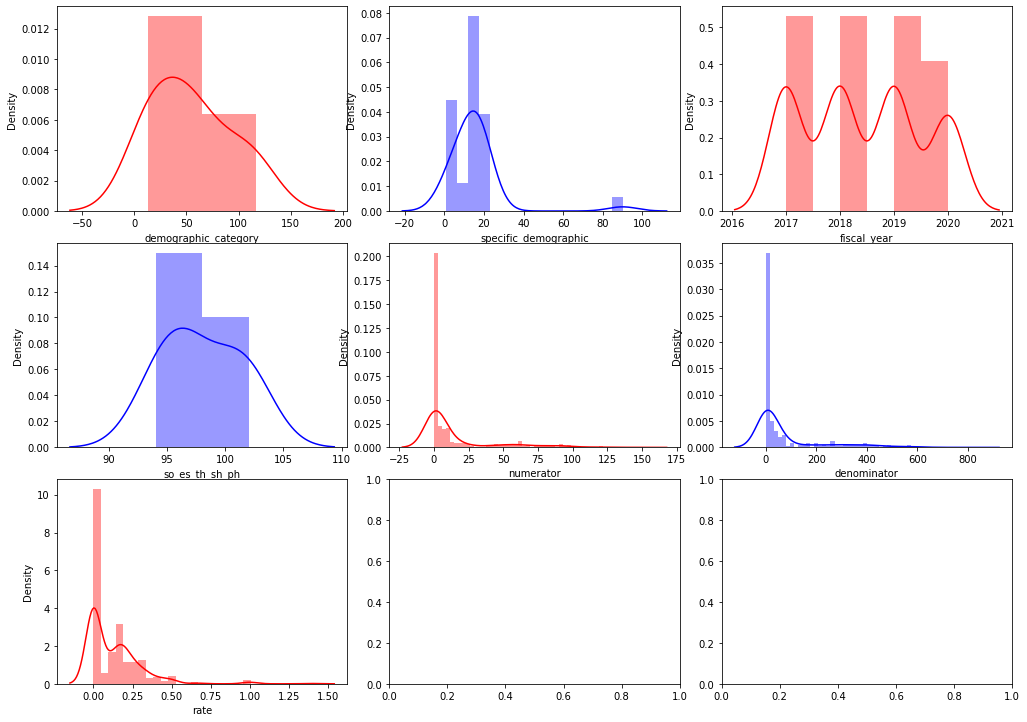

In [10]:
df = df_return_to_homelessness
fig,axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
plt.tight_layout();
sns.distplot(df['demographic_category'].value_counts(), color='r', ax=axes[0][0]);
sns.distplot(df['specific_demographic'].value_counts(), color='b', ax=axes[0][1]);
sns.distplot(df['fiscal_year'], color='r', ax=axes[0][2]);
sns.distplot(df['so_es_th_sh_ph'].value_counts(), color='b', ax=axes[1][0]);
sns.distplot(df['numerator'], color='r', ax=axes[1][1]);
sns.distplot(df['denominator'], color='b', ax=axes[1][2]);
sns.distplot(df['rate'], color='r', ax=axes[2][0]);


In [11]:
fig=px.violin(df, y='rate', color='fiscal_year', points='all', hover_name='demographic_category', hover_data=['specific_demographic'])
fig.show()

In [12]:
fig = px.scatter(df,x='demographic_category', y='rate',color='fiscal_year',hover_name='specific_demographic',hover_data=['numerator','denominator'])
fig.show()

In [13]:
fig= px.scatter(df, x='numerator', y='denominator', animation_frame='fiscal_year', animation_group='demographic_category', hover_name='demographic_category',hover_data=['specific_demographic','rate'])
fig.show()

Another way to visualize how all the data falls in place

In [17]:
df = df.tail(50)
fig = px.parallel_coordinates(df, color="fiscal_year", labels={"fiscal_year": "Fiscal Year",
                  "numerator": "Numerator", "denominator": "Denominator",
                  "rate": "Rate", "demographic_category": "Democratic Category", 
                  "so_es_th_sh_ph": 'SO/ES/TH/SH/PH', 'specific_demographic':'Specific Demographic' },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

## Conclusion:

* We can remove the numerator and denominator from this file. Doing so will not harm the data and we may see correlation between other categories go up. 
* We can create a model out of this data to predict the rate of return to homelessness given these specific pieces of data. 

* Data can use more cleaning/feature engineering, visuals can be updated after cleaning, model can be built to test hypothesis,

# Implementation of Recommeded Edits

* drop rate to 0.6. Save outliers in original df, as this may be something that gives an insight into groups that have higher rates of discrimination

* drop col numerator and denominator

In [31]:
mask = 0.7

df1 = df_return_to_homelessness[df_return_to_homelessness.rate < mask]

df1 = df1.drop(columns=['numerator', 'denominator', 'Unnamed: 0'])

In [32]:
df1.head()

,demographic_category,specific_demographic,fiscal_year,so_es_th_sh_ph,rate,fiscal_year_start,fiscal_year_end
0,Race,American Indian or Alaskan Native,2017,SO,0.0,2016-10-01,2017-09-30
1,Race,Asian,2017,SO,0.0,2016-10-01,2017-09-30
2,Race,Black or African American,2017,SO,0.0,2016-10-01,2017-09-30
3,Race,Native Hawaiian or Other Pacific Islander,2017,SO,0.0,2016-10-01,2017-09-30
4,Race,White,2017,SO,0.0,2016-10-01,2017-09-30


<AxesSubplot:>

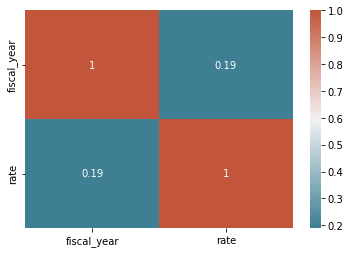

In [51]:
# Create a correlation matrix
corr = df1.corr()

# Plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Using a correlation matrix will give us only Numerical Features. If we wanted to add the rest of the categorical features, we could build a pipeline for an encoder, then process those correlation values. 

In [41]:
fig1 = px.scatter(df1,x='so_es_th_sh_ph', y='rate',color='fiscal_year',hover_name='specific_demographic',hover_data=['fiscal_year_end','demographic_category'], width=800, height= 800, color_continuous_scale= 'greens')
fig1.show()

In [46]:
fig1 = px.scatter(df_return_to_homelessness,x='so_es_th_sh_ph', y='rate',color='fiscal_year',hover_name='specific_demographic',hover_data=['fiscal_year_end','demographic_category'], width=800, height= 1200, color_continuous_scale= 'greens')
fig1.show()

In [43]:
fig2 = px.bar(df1, x='so_es_th_sh_ph', y = 'rate',hover_name= 'specific_demographic', hover_data= ['demographic_category', 'specific_demographic'], color_continuous_scale='greens', height = 800, width= 800, )
fig2.show()

In [44]:
fig2 = px.bar(df_return_to_homelessness, x='so_es_th_sh_ph', y = 'rate',hover_name= 'specific_demographic', hover_data= ['demographic_category', 'specific_demographic'], color_continuous_scale='greens', height = 800, width= 800, )
fig2.show()

In [47]:
fig2 = px.bar(df_return_to_homelessness, x='rate', y = 'so_es_th_sh_ph',hover_name= 'specific_demographic', hover_data= ['demographic_category', 'specific_demographic'], color_continuous_scale='greens', height = 800, width= 800, )
fig2.show()

In [50]:
fig2 = px.bar(df1, x='rate', y = 'so_es_th_sh_ph',hover_name= 'specific_demographic', hover_data= ['demographic_category', 'specific_demographic'], color_continuous_scale='greens', height = 800, width= 800, )
fig2.show()